<h2> Predykcja ryzyka zerwania przez klienta umowy w sieci telekomunikacyjnej </h2>

Magdalena Kwiatkowska

Patryk Święcicki

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import * 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
for i in df.columns: 
    print(f'Wartości unikatowe: {i}, liczba: {df[i].nunique()}')
    print(f'{df[i].unique()}')

Wartości unikatowe: customerID, liczba: 7043
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Wartości unikatowe: gender, liczba: 2
['Female' 'Male']
Wartości unikatowe: SeniorCitizen, liczba: 2
[0 1]
Wartości unikatowe: Partner, liczba: 2
['Yes' 'No']
Wartości unikatowe: Dependents, liczba: 2
['No' 'Yes']
Wartości unikatowe: tenure, liczba: 73
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Wartości unikatowe: PhoneService, liczba: 2
['No' 'Yes']
Wartości unikatowe: MultipleLines, liczba: 3
['No phone service' 'No' 'Yes']
Wartości unikatowe: InternetService, liczba: 3
['DSL' 'Fiber optic' 'No']
Wartości unikatowe: OnlineSecurity, liczba: 3
['No' 'Yes' 'No internet service']
Wartości unikatowe: OnlineBackup, liczba: 3
['Yes' 'No' 'No internet service']
Wartości unikatowe: Devic

<h3>Po przeglądnięciu  powyższych danych możemy opisać nasz zbiór: </h3>
    
<h4>Etykieta: </h4>

 * Churn – decyzja jaka podejmuje klient, odchodzi lub nie (Yes, No)

<h4>Usługi które mogą wpływać na decyzyjność klientów: </h4>

* PhoneService -- (Yes, No)
* MultipleLines -- Yes, No, No phone service)
* InternetService – (DSL, Fiber optic, No)
* OnlineSecurity -- (Yes, No, No internet service)
* OnlineBackup  -- (Yes, No, No internet service)
* DeviceProtection -- (Yes, No, No internet service)
* TechSupport -- (Yes, No, No internet service)
* StreamingTV -- (Yes, No, No internet service)
* StreamingMovies -- (Yes, No, No internet service)

<h4>Informacje dotyczące konta klienta:</h4>

* Tenure – przez jak długi okres do daty zebrania danych osoba była klientem firmy – miesiące 
* Contract – długość obowiązującej umowy – miesiące 
* PaperlessBilling -- (Yes, No)
* PaymentMethod -- (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) 
* MonthlyCharges –kwota rachunku miesięcznego 
* TotalCharges  -- całkowita kwota obciążeń 

<h4> Dane o kliencie: </h4>

* customerID
* Gender – ('Female' 'Male')
* SeniorCitizen – (1, 0)
* Partner -- (Yes, No)
* Dependents – (Yes, No)


<h3>Data Preprocessing:  </h3>


In [5]:
df.loc[: ,'TotalCharges'] = pd.to_numeric(df.loc[:,'TotalCharges'], errors = 'coerce')
df["tenure"] = pd.to_numeric(df["tenure"], downcast="float")
#print(df.dtypes)

In [6]:
payment_columns = {'Electronic check': 'E-check', 'Mailed check':'MailedCheck', 'Bank transfer (automatic)': 'BankTransfer', 'Credit card (automatic)': 'CreditCard'}
df['PaymentMethod'].replace(payment_columns, inplace = True)
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<h3>Data Exploration: </h3>

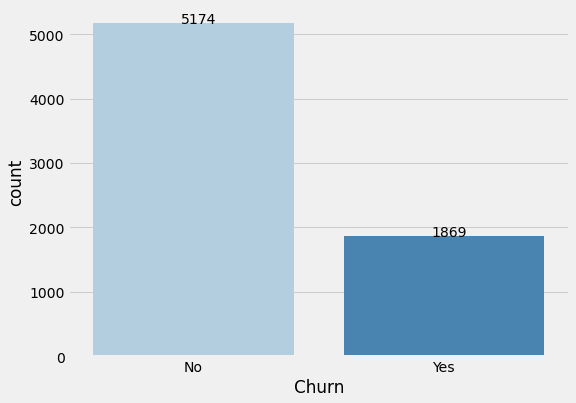

In [7]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (8,6))
ax = sns.countplot(x = df['Churn'], palette = 'Blues')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()))

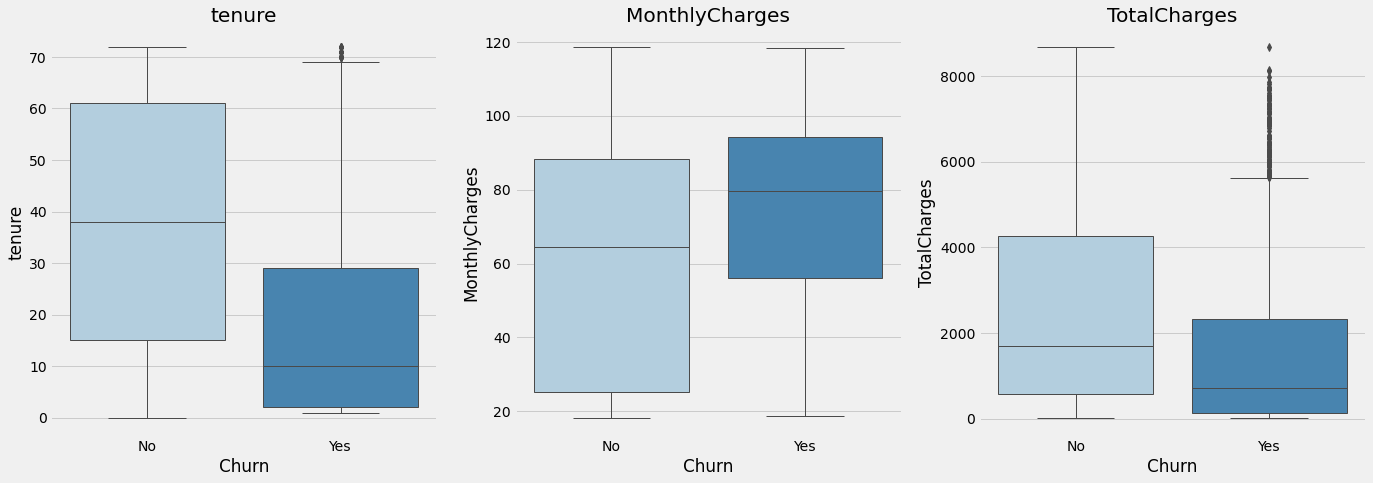

In [8]:
plots = {1:[111], 2:[121, 122], 3:[131, 132, 133], 4:[221, 222, 233, 224], 5:[231, 232, 233, 234, 235], 
         6:[231, 232, 233, 234, 235, 236]} 

def boxplot(x,y, df): 
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    plt.figure(figsize=(7*columns, 7*rows))
    
    for i, j in enumerate(y): 
        plt.subplot(plots[len(y)][i])
        ax = sns.boxplot(x=x, y=j, data=df[[x,j]], palette='Blues', linewidth=1)
        ax.set_title(j)
        
    return plt.show()
    
boxplot('Churn', ['tenure', 'MonthlyCharges', 'TotalCharges'], df)

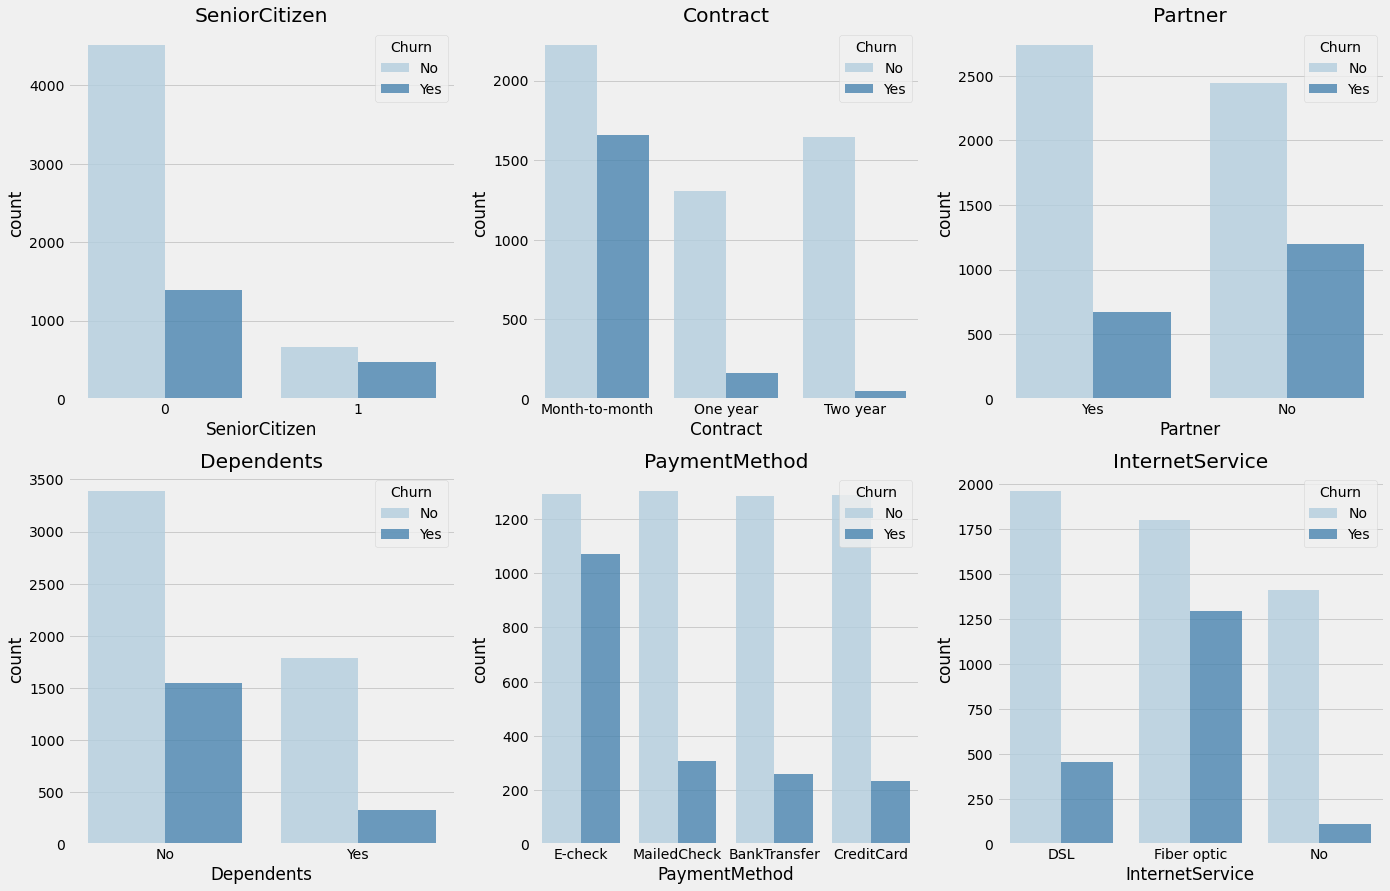

In [9]:
def countplot(x, y, df):
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    plt.figure(figsize=(7*columns, 7*rows))
    
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.countplot(x=j, hue=x, data=df, palette='Blues', alpha=0.8, linewidth=0.4)
        ax.set_title(j)
        
    return plt.show()

countplot('Churn', ['SeniorCitizen', 'Contract', 'Partner', 'Dependents', 'PaymentMethod', 'InternetService'], df)

<h3> Sprawdzenie czy dla outliers da się zastosować metodę  IQR: </h3>    

In [10]:
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_num = df.loc[:, ['tenure', 'MonthlyCharges', 'TotalCharges']]
df_num.describe()

q1 = df_num.quantile(0.25)
q3 = df_num.quantile(0.75)
iqr = q3 - q1
iqr
((df_num< (q1 - 1.5 * iqr)) | (df_num)> (q3 + 1.5 * iqr)).any()

tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

In [11]:
# metoda IQR nie dokona żandych zmian, można użyć: 

df = df.dropna()

<h3>Przygotowanie danych do modelu: </h3>

In [12]:
df = df.drop(columns = 'customerID')

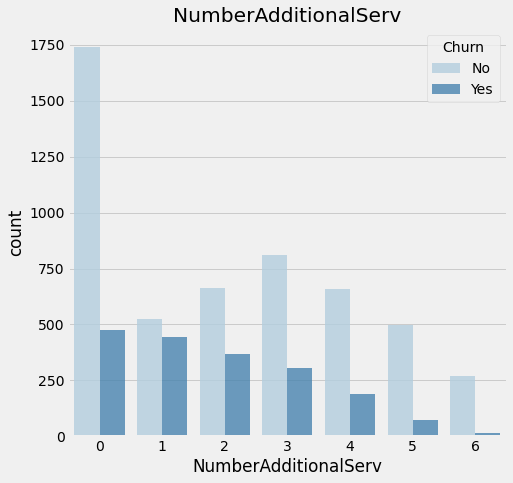

In [13]:
# stworzenie kolumny będącej podsumowaniem dodatkowych usług – agregacja 
df['NumberAdditionalServ'] = (df[['OnlineSecurity', 'DeviceProtection', 'StreamingMovies', 'TechSupport', 'StreamingTV', 'OnlineBackup']]
                             == 'Yes').sum(axis = 1)
countplot('Churn', ['NumberAdditionalServ'], df)

In [14]:
# Label Encoding:

features_le = ['gender', 'Partner', 'Dependents', 'Churn', 'PhoneService', 'PaperlessBilling']

def lable_encoding(fe, df):
    for i in fe: 
        df[i] = df[i].map({'Yes': 1, 'No':0})
        
lable_encoding(['Partner', 'Dependents', 'Churn', 'PhoneService', 'PaperlessBilling'], df)

df['gender'] = df['gender'].map({'Female':1, 'Male':0})

In [15]:
# One-Hot Encoding 

features_ohe = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'NumberAdditionalServ']
df = pd.get_dummies(df, columns = features_ohe)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,PaymentMethod_CreditCard,PaymentMethod_E-check,PaymentMethod_MailedCheck,NumberAdditionalServ_0,NumberAdditionalServ_1,NumberAdditionalServ_2,NumberAdditionalServ_3,NumberAdditionalServ_4,NumberAdditionalServ_5,NumberAdditionalServ_6
0,1,0,1,0,1.0,0,1,29.85,29.85,0,...,0,1,0,0,1,0,0,0,0,0
1,0,0,0,0,34.0,1,0,56.95,1889.50,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,0,0,2.0,1,1,53.85,108.15,1,...,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,45.0,0,0,42.30,1840.75,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,2.0,1,1,70.70,151.65,1,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24.0,1,1,84.80,1990.50,0,...,0,0,1,0,0,0,0,0,1,0
7039,1,0,1,1,72.0,1,1,103.20,7362.90,0,...,1,0,0,0,0,0,0,1,0,0
7040,1,0,1,1,11.0,0,1,29.60,346.45,0,...,0,1,0,0,1,0,0,0,0,0
7041,0,1,1,0,4.0,1,1,74.40,306.60,1,...,0,0,1,1,0,0,0,0,0,0


<AxesSubplot:>

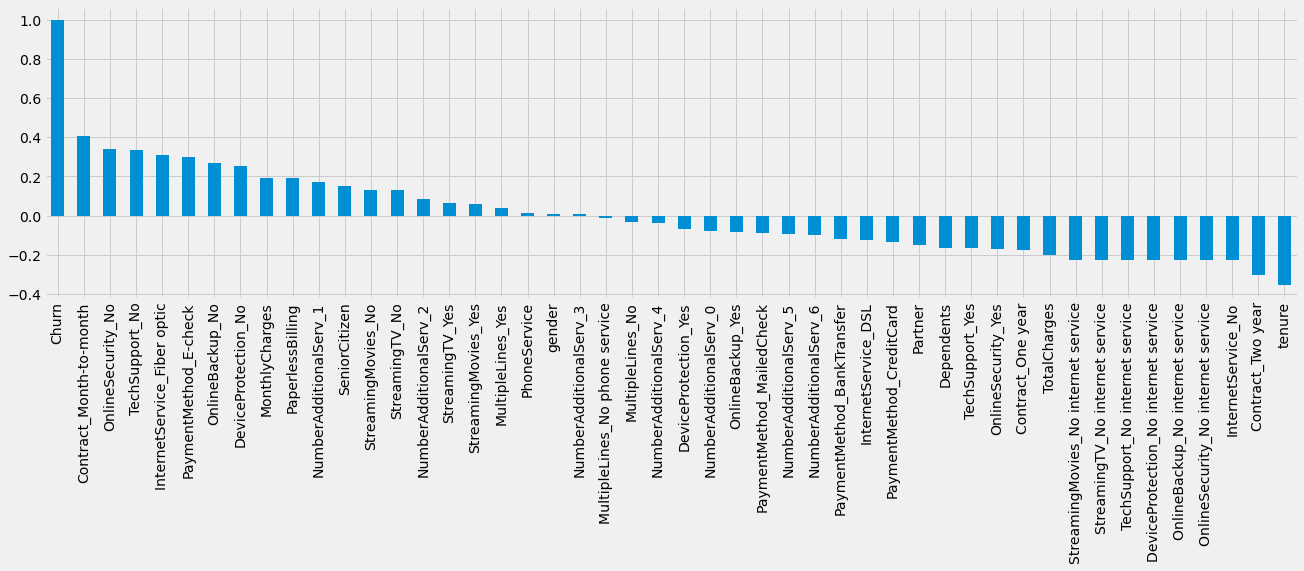

In [20]:
# Min-Max-Scaling

from sklearn.preprocessing import MinMaxScaler

df_features_mms = pd.DataFrame(df, columns=num_features)
df_remaining_features = df.drop(columns = num_features)

mms = MinMaxScaler()
rescaled_fe = mms.fit_transform(df_features_mms)
df_rescaled_features = pd.DataFrame(rescaled_fe, columns = num_features, index = df_remaining_features.index)

df = pd.concat([df_remaining_features, df_rescaled_features], axis =1)

plt.figure(figsize = (16,10))
df.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar', figsize=(20,5))

In [ ]:
# Train-Test-Split
